# Katrina NWS13

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import os
import matplotlib.pyplot as plt
import adcircpy
from adcircpy.outputs import (
    Maxele,
    MaximumElevationTimes,
    Fort63,
    Fort61,
    Minpr,
    Maxwvel,
    Maxvel,
)
from sithom.plot import plot_defaults
from src.constants import KAT_EX_PATH, NO_BBOX

plot_defaults()

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(
/Users/simon/new-orleans/env/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [4]:
NWS13_PATH: str = (
    "/Users/simon/adcirc-swan/adcirc-testsuite/adcirc/adcirc_katrina-2d-nws13/"
)

In [21]:
!pip install xugrid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 2.8 MB/s eta 0:00:008.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 1.8 MB/s eta 0:00:00
  Using cached rich-12.5.1-py3-none-any.whl (235 kB)
  Using cached commonmark-0.9.1-py2.py3-none-any.whl (51 kB)
  Created wheel for xugrid: filename=xugrid-0.1.7-py3-none-any.whl size=80547 sha256=6ee2b2e94aa23cbfb38c22e9fbdcb59565b72c5f1d6f982e2604b339af9ac5ed
  Stored in directory: /Users/simon/Library/Caches/pip/wheels/09/a9/69/c8843adc31adcf185e424555f8f1fd2413fdfd17d2aa867d77
  C

In [25]:
import xugrid

xugrid.open_dataset(os.path.join(NWS13_PATH, "maxele.63.nc"))

ValueError: dimension 'neta' already exists as a scalar variable

In [ ]:
[
    "assignValue",
    "chartostring",
    "chunking",
    "coordinates",
    "datatype",
    "delncattr",
    "dimensions",
    "dtype",
    "endian",
    "filters",
    "getValue",
    "get_dims",
    "get_var_chunk_cache",
    "getncattr",
    "group",
    "location",
    "long_name",
    "mask",
    "mesh",
    "name",
    "ncattrs",
    "ndim",
    "renameAttribute",
    "scale",
    "set_always_mask",
    "set_auto_chartostring",
    "set_auto_mask",
    "set_auto_maskandscale",
    "set_auto_scale",
    "set_collective",
    "set_ncstring_attrs",
    "set_var_chunk_cache",
    "setncattr",
    "setncattr_string",
    "setncatts",
    "shape",
    "size",
    "standard_name",
    "units",
    "use_nc_get_vars",
]

In [32]:
import netCDF4 as nc

nc.Dataset(os.path.join(KAT_EX_PATH, "maxele.63.nc"))["zeta_max"]

<class 'netCDF4._netCDF4.Variable'>
float64 zeta_max(node)
    long_name: maximum water surface elevationabove geoid
    standard_name: maximum_sea_surface_height_above_geoid
    coordinates: y x
    location: node
    mesh: adcirc_mesh
    units: m
    _FillValue: -99999.0
unlimited dimensions: 
current shape = (8303,)
filling on

In [34]:
nc.Dataset(os.path.join(KAT_EX_PATH, "maxele.63.nc"))["zeta_max"].units

'm'

Text(0.5, 0, 'Height [m]')

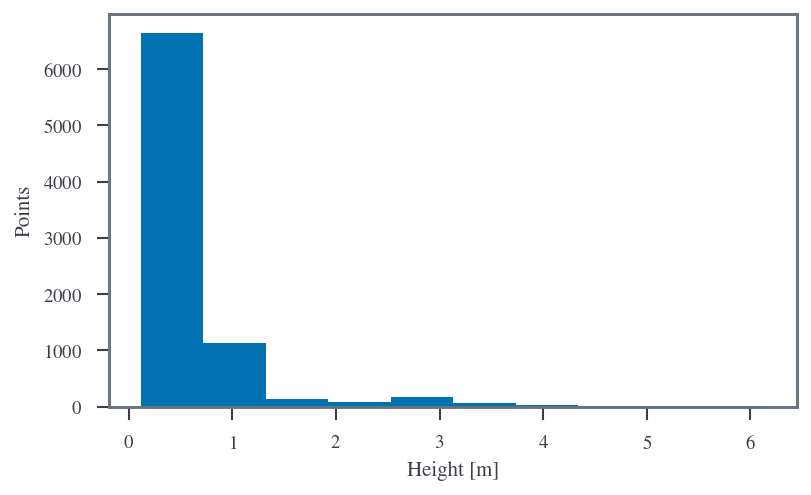

In [50]:
import matplotlib.pyplot as plt

plt.hist(nc.Dataset(os.path.join(KAT_EX_PATH, "maxele.63.nc"))["zeta_max"][:])
plt.ylabel("Points")
plt.xlabel("Height [m]")

In [36]:
nc.Dataset(os.path.join(KAT_EX_PATH, "maxele.63.nc"))["zeta_max"].mesh

'adcirc_mesh'

In [38]:
nc.Dataset(os.path.join(KAT_EX_PATH, "maxele.63.nc"))["zeta_max"].getValue()

IndexError: to retrieve values from a non-scalar variable, use slicing

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

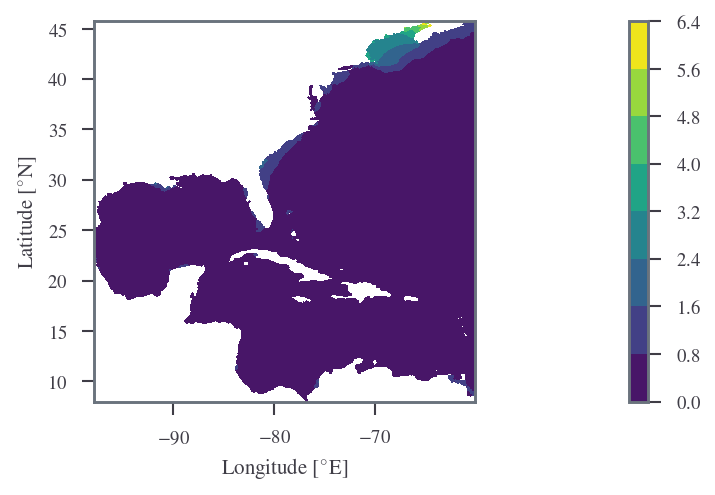

In [20]:
maxele = Maxele(os.path.join(NWS13_PATH, "maxele.63.nc"), crs="EPSG:4326")
maxele.tricontourf(cbar=True, label="[m]")
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

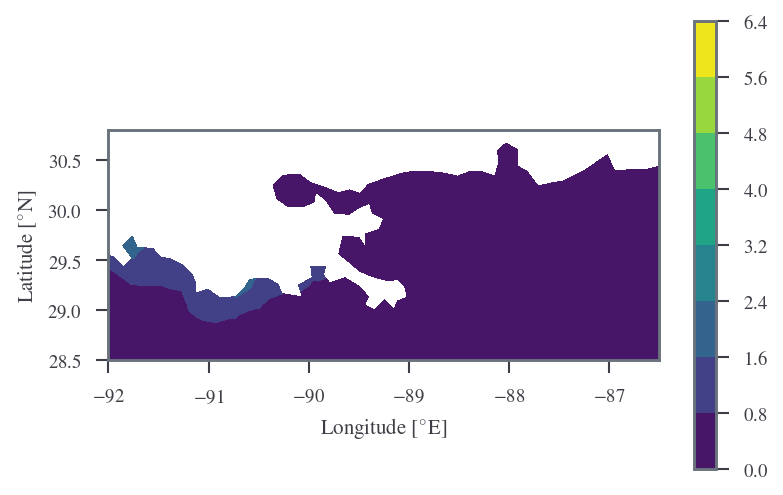

In [6]:
maxele = Maxele(os.path.join(NWS13_PATH, "maxele.63.nc"), crs="EPSG:4326")
maxele.tricontourf(cbar=True)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

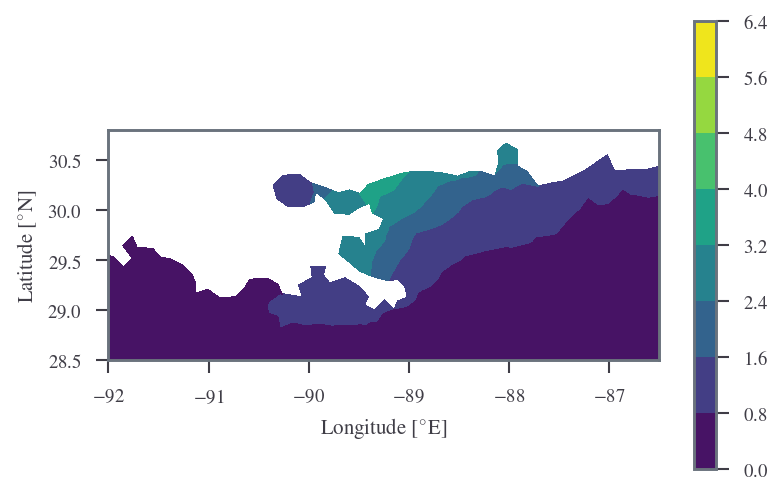

In [10]:
maxele = Maxele(os.path.join(KAT_EX_PATH, "maxele.63.nc"), crs="EPSG:4326")
maxele.tricontourf(cbar=True)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

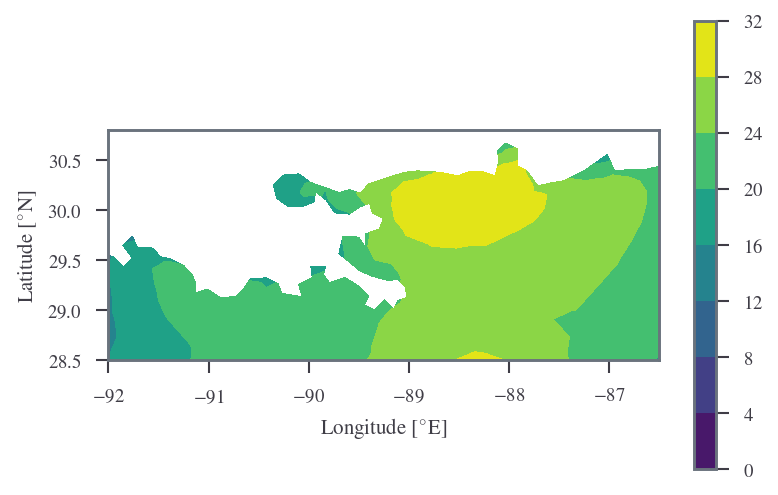

In [8]:
plot_defaults()
maxwvel = Maxwvel(os.path.join(NWS13_PATH, "maxwvel.63.nc"), crs="EPSG:4326")
maxwvel.tricontourf(cbar=True)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

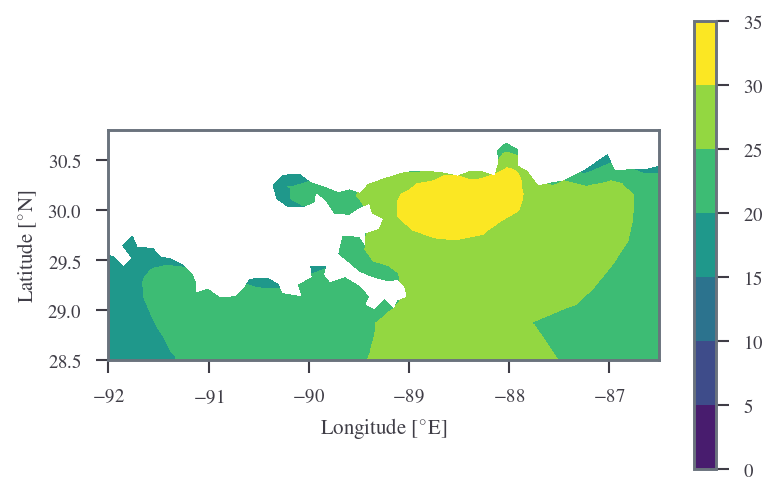

In [9]:
maxwvel = Maxwvel(os.path.join(KAT_EX_PATH, "maxwvel.63.nc"), crs="EPSG:4326")
maxwvel.tricontourf(cbar=True)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

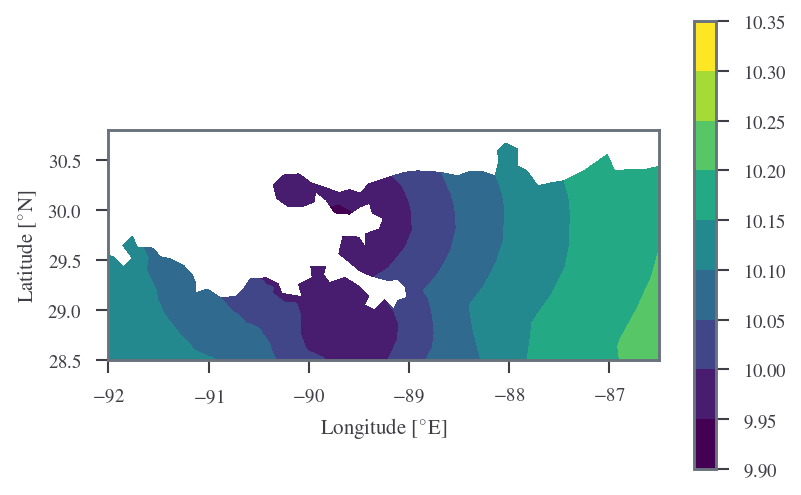

In [13]:
minpr = Minpr(os.path.join(NWS13_PATH, "minpr.63.nc"), crs="EPSG:4326")
minpr.tricontourf(cbar=True)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

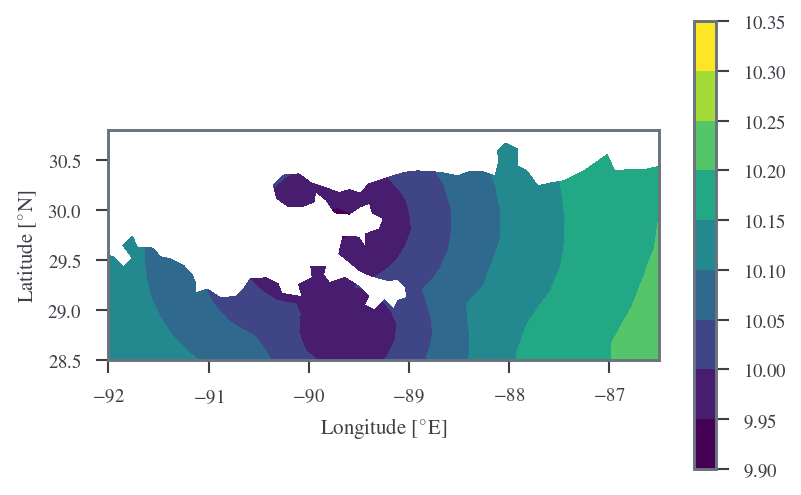

In [18]:
minpr = Minpr(os.path.join(KAT_EX_PATH, "minpr.63.nc"), crs="EPSG:4326")
minpr.tricontourf(cbar=True, label="Pressure")
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")